### Optimistic Initial Values

* It's a simple modification of purely greedy method
* No need for epsilon/random exploation

***NOTE:In EPSION GREEDY Implementation We initialized mean estimate to 0 , which is never used***
***here we initialize mean to very large value, which will be use in this case***

##### Ex.

    class Bandit:
        def __init__(self, p):
            self.p = p
            self.p_estimate = 10 #
     

    # greedy loop
    for n in range(NUM_TRIALS):
        j = argmax(b.p_estimate for b in bandits)
        ....

#### Choosing the bandit

* Be greedy
* Choose the bandit arm with "largest estimated mean"
* Goal of this is to balance exploration(collect data) and exploitation
* Early in experiment when we haven't collect much data yet:
    * less data
    * Estimated meam is large (because inital value is large / optimistic)
* Later in experiment:
    * Lots of data will get collected
    * Estimated mean continues to get smaller until we stop choosing the bandit or it converges
* Arithmetic average: even if initial value is very large, its effect disappears as more data collected


#### Role of Initial Value

* High initial value: explore, because the greedy algorithm believes the mean is high, even if it isn't
* Extremely high = more exploration
* Less high = less exploration
* It's a hyperparameter that controls the amount of exploration

In [1]:
import matplotlib.pyplot as plt
import numpy as np

mean estimate: 0.6666666666666666
mean estimate: 0.6470588235294118
mean estimate: 0.699007717750828
Total reward earned:  6976.0
Win rates:  0.6976
NUM time selected each bandit: [9.0, 17.0, 9977.0]


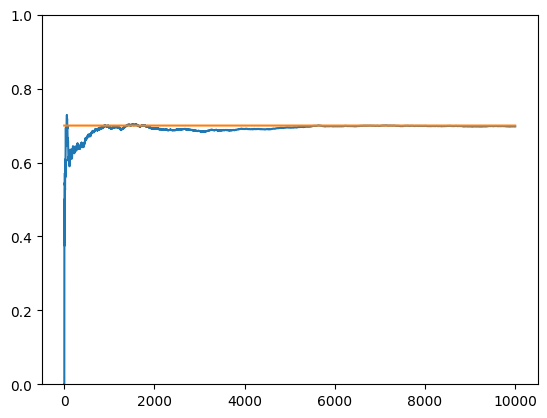

In [6]:
#Example

BANDIT_PROBABILITYES = [0.2, 0.5, 0.7]
NUM_TRIALS = 10000

class Bandit:
    def __init__(self, p):
        # p: the win rate 
        self.p = p
        self.p_estimate = 5.
        self.N = 1. # num of sample collected so far
    
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITYES]
    
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        # use optimistic initial values to select the next bandit
        j = np.argmax([b.p_estimate for b in bandits])
        
        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
        
        
    # print mean estimate
    for b in bandits:
        print("mean estimate:",b.p_estimate)
        
    
    # print total reward
    print("Total reward earned: ", rewards.sum())
    print("Win rates: ", rewards.sum()/NUM_TRIALS)
    print("NUM time selected each bandit:", [b.N for b in bandits])
    
    
    # plot the result
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.ylim([0, 1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITYES))
    plt.show()
    
    
    
experiment()
    